In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
from mpl_toolkits import mplot3d

# Clean & Filter Dataset

In [87]:
df = pd.read_csv('../Datasets/games-features.csv')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df = df.loc[df['ReleaseDate'].notnull()]
df = df.loc[df['GenreIsNonGame'] == False]
# CONSIDER DROPPING GAMES THAT HAVEN'T BEEN OWNED
df = df.loc[df['SteamSpyOwners'] > 0]
df = df.drop(columns=['QueryID', 'ResponseID', 'QueryName', 'PackageCount',
                      'AchievementHighlightedCount', 'AchievementCount', 'ControllerSupport', 'PCReqsHaveMin',
                      'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
                      'MacReqsHaveRec', 'SupportEmail', 'SupportURL', 'ExtUserAcctNotice',
                      'HeaderImage', 'LegalNotice', 'Website', 'PCMinReqsText',
                      'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText'])
# log of Stea
df['log_owners'] = np.log(df['SteamSpyOwners'])
df.head()

,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,PriceInitial,PriceFinal,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages,log_owners
0,Counter-Strike,2000-11-01,0,0,1,0,88,0,68991,1,...,9.99,9.99,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,English French German Italian Spanish Simplifi...,16.383021
1,Team Fortress Classic,1999-04-01,0,0,1,0,0,0,2439,1,...,4.99,4.99,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,English French German Italian Spanish,15.501750
2,Day of Defeat,2003-05-01,0,0,1,0,79,0,2319,1,...,4.99,4.99,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,English French German Italian Spanish,15.846432
3,Deathmatch Classic,2001-06-01,0,0,1,0,0,0,888,1,...,4.99,4.99,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,English French German Italian Spanish,15.830276
4,Half-Life: Opposing Force,1999-11-01,0,0,1,0,0,0,2934,1,...,4.99,4.99,Return to the Black Mesa Research Facility as ...,http://cdn.akamai.steamstatic.com/steam/apps/5...,,Return to the Black Mesa Research Facility as ...,,,English French German Korean,15.501817


In [88]:
def quarter(x):
    if np.isnan(x['ReleaseMonth']):
        return x['ReleaseMonth']
    else:
        val = x['ReleaseMonth'] / 3
        if ((val * 100) %  100 >= 50) | ((val * 100) % 100 == 0):
            return round(val)
        else:
            return round(val) + 1

In [89]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseQuarter'] = df.apply(quarter, axis = 1)

# Release Year V.S. Log_Owners

In [138]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['ReleaseYear']).reshape(-1,1), 
                                                    np.array(df['log_owners']).reshape(-1,1), test_size = 0.3)

In [145]:
lr = LinearRegression()
lr.fit(x_train, y_train)  
R_2 = lr.score(x_train, y_train)
preds = lr.predict(x_test)
print('R^2 score:', R_2) 
print('RMSE:', np.sqrt(np.mean(y_test - preds)**2))
print('Correlation Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)

R^2 score: 0.219228221878353
RMSE: 0.04514654133372736
Correlation Coefficient: [[-0.41461113]]
Intercept: [845.12356987]


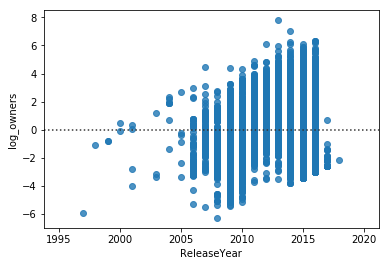

In [159]:
sns.residplot(data=df, x='ReleaseYear', y='log_owners')
ax.set_title('Residual Plot for Release Year V.S Logged Steam Spy Owners')
plt.show()

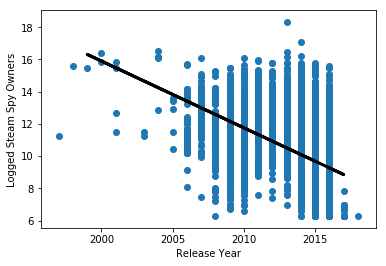

In [149]:
plt.plot(np.array(x_test), preds, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.xlabel('Release Year')
plt.ylabel('Logged Steam Spy Owners')
plt.show()

# Metacritic V.S SteamSpyOwners

In [160]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['Metacritic']).reshape(-1,1), 
                                                    np.array(df['SteamSpyOwners']).reshape(-1,1), test_size = 0.3)

In [161]:
lr = LinearRegression()
lr.fit(x_train, y_train)  
R_2 = lr.score(x_train, y_train)
preds = lr.predict(x_test)
print('R^2 score:', R_2) 
print('RMSE:', np.sqrt(np.mean(y_test - preds)**2))
print('Correlation Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)

R^2 score: 0.034372685805919345
RMSE: 14358.622464492577
Correlation Coefficient: [[8073.05601346]]
Intercept: [84996.19364584]


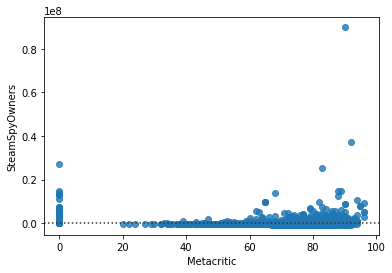

In [162]:
sns.residplot(data=df, x='Metacritic', y='SteamSpyOwners')
ax.set_title('Residual Plot for Metacritic V.S Steam Spy Owners')
plt.show()

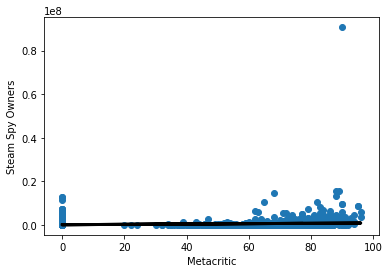

In [163]:
plt.plot(np.array(x_test), preds, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.xlabel('Metacritic')
plt.ylabel('Steam Spy Owners')
plt.show()

# Metacritic V.S Log_Owners

In [164]:
subset = df.loc[df['Metacritic'] != 0]

In [167]:
x_train, x_test, y_train, y_test = train_test_split(np.array(subset['Metacritic']).reshape(-1,1), 
                                                    np.array(subset['log_owners']).reshape(-1,1), test_size = 0.3)

In [169]:
lr = LinearRegression()
lr.fit(x_train, y_train)  
R_2 = lr.score(x_train, y_train)
preds = lr.predict(x_test)
print('R^2 score:', R_2) 
print('RMSE:', np.sqrt(np.mean(y_test - preds)**2))
print('Correlation Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)

R^2 score: 0.16423185748673375
RMSE: 0.036240698411889066
Correlation Coefficient: [[0.06627214]]
Intercept: [7.02781883]


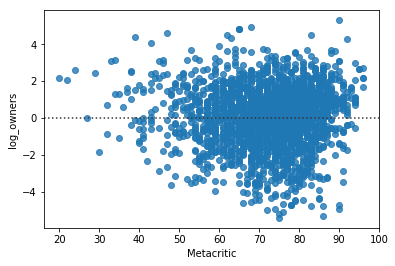

In [171]:
sns.residplot(data=subset, x='Metacritic', y='log_owners')
ax.set_title('Residual Plot for Metacritic V.S Logged Steam Spy Owners')
plt.show()

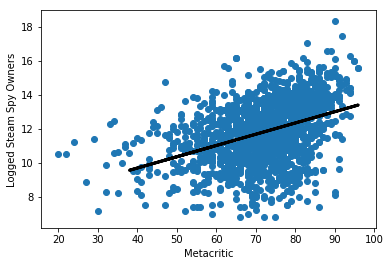

In [172]:
plt.plot(np.array(x_test), preds, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.xlabel('Metacritic')
plt.ylabel('Logged Steam Spy Owners')
plt.show()

# Release Year & Metacritic (Non-Zero) V.S. Log_Owners

In [173]:
x_train, x_test, y_train, y_test = train_test_split(subset[['ReleaseYear', 'Metacritic']], 
                                                    np.array(subset['log_owners']).reshape(-1,1), test_size = 0.3)

In [174]:
lr = LinearRegression()
lr.fit(x_train, y_train)  
R_2 = lr.score(x_train, y_train)
preds = lr.predict(x_test)
print('R^2 score:', R_2) 
print('RMSE:', np.sqrt(np.mean(y_test - preds)**2))
print('Correlation Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)

R^2 score: 0.24834360110373432
RMSE: 0.02539367897518837
Correlation Coefficient: [[-0.18318199  0.05852641]]
Intercept: [376.23225297]


In [35]:
fit_line = reg.coef_[0, 0] * xline + reg.coef_[0, 1] * yline + reg.intercept_

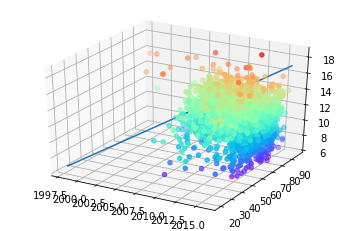

In [177]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline = np.linspace(subset['ReleaseYear'].min(), subset['ReleaseYear'].max(), len(subset['ReleaseYear']))
yline = np.linspace(subset['Metacritic'].min(), subset['Metacritic'].max(), len(subset['ReleaseYear']))
zline = np.linspace(y_test.min(), y_test.max(), len(subset['ReleaseYear']))
ax.plot(xline, yline, zline)
zdata = subset['log_owners']
ydata = subset['Metacritic']
xdata = subset['ReleaseYear']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='rainbow');
plt.show()

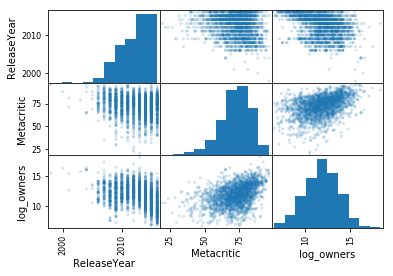

In [178]:
pd.plotting.scatter_matrix(subset[['ReleaseYear', 'Metacritic', 'log_owners']], alpha=0.2)
plt.show()

 # RecommendationCountLog V.S Log_Owners

In [39]:
subset = df.loc[df['RecommendationCount'] != 0].copy()
subset['RecommendationCountLog'] = np.log(subset['RecommendationCount'])

In [40]:
outcome, predictors = patsy.dmatrices("log_owners ~ RecommendationCountLog", subset)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     8248.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:29:53   Log-Likelihood:                -6657.1
No. Observations:                4776   AIC:                         1.332e+04
Df Residuals:                    4774   BIC:                         1.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

R^2 score:  0.6395936042942235


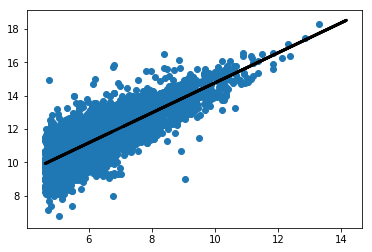

In [41]:
x_train, x_test, y_train, y_test = train_test_split(np.array(subset['RecommendationCountLog']), 
                                                    np.array(subset['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
#plt.xlabel('Difference in numbers of people between male and female')
#plt.ylabel('Total Housing Price')
plt.show()

In [42]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [5.77546415]
Coefficients: 
 [[0.90030328]]


In [43]:
print('RMSE:', np.sqrt(np.mean((y_test - predicted)**2)))

RMSE: 2.061883644185219


# Release Year & Metacritic (Non-Zero) & RecommendationCountLog V.S. Log_Owners

In [44]:
subset = subset.loc[subset['Metacritic'] != 0]
outcome, predictors = patsy.dmatrices("log_owners ~ ReleaseYear + Metacritic + RecommendationCountLog", subset)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     2529.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        08:30:44   Log-Likelihood:                -1875.8
No. Observations:                1800   AIC:                             3760.
Df Residuals:                    1796   BIC:                             3782.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                395

In [45]:
x_train, x_test, y_train, y_test = train_test_split(subset[['ReleaseYear', 'Metacritic', 'RecommendationCountLog']], 
                                                    np.array(subset['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(x_train, np.reshape(y_train, (-1, 1)))
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train, np.reshape(y_train, (-1, 1))))
plt.show()

R^2 score:  0.8095981433608898


In [46]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_[0])

Intercept: 
 [397.18343955]
Coefficients: 
 [-0.19425043  0.00624769  0.78845969]


In [49]:
print('RMSE:', np.sqrt(np.mean((y_test - predicted)**2)))

RMSE: 1.9760205033835696


# Genre V.S. LogOwners

In [66]:
genre_lst = ['SteamSpyOwners', 'GenreIsNonGame',
             'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
             'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess',
             'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'log_owners']

In [67]:
subset = df[genre_lst]

In [77]:
X = subset.drop(columns = ['SteamSpyOwners', 'log_owners'])
y = np.array(subset['SteamSpyOwners']).reshape(-1, 1) 

lr = LinearRegression()
lr.fit(X, y)  # X is dataframe of training data; y a series of prices
R_2 = lr.score(X, y)  # R-squared
print('R^2:', R_2)

R^2: 0.04048914398200232


In [70]:
y = np.array(subset['SteamSpyOwners']).reshape(-1, 1) 
dict_Rscore = {}
for col in subset.drop(columns = ['SteamSpyOwners', 'log_owners']).columns.tolist():
    X = np.array(subset[col]).reshape(-1, 1) 
    lr = LinearRegression()
    lr.fit(X, y)  # X is dataframe of training data; y a series of prices
    R_2 = lr.score(X, y)  # R-squared
    dict_Rscore[col] = R_2

In [73]:
pd.Series(dict_Rscore)

GenreIsNonGame                 0.000000
GenreIsIndie                   0.010066
GenreIsAction                  0.006206
GenreIsAdventure               0.001282
GenreIsCasual                  0.004190
GenreIsStrategy                0.000002
GenreIsRPG                     0.000202
GenreIsSimulation              0.000484
GenreIsEarlyAccess             0.000195
GenreIsFreeToPlay              0.020081
GenreIsSports                  0.000140
GenreIsRacing                  0.000197
GenreIsMassivelyMultiplayer    0.004669
dtype: float64

In [74]:
y = np.array(subset['log_owners']).reshape(-1, 1) 
dict_Rscore = {}
for col in subset.drop(columns = ['SteamSpyOwners', 'log_owners']).columns.tolist():
    X = np.array(subset[col]).reshape(-1, 1) 
    lr = LinearRegression()
    lr.fit(X, y)  # X is dataframe of training data; y a series of prices
    R_2 = lr.score(X, y)  # R-squared
    dict_Rscore[col] = R_2

In [75]:
pd.Series(dict_Rscore)

GenreIsNonGame                 0.000000
GenreIsIndie                   0.040961
GenreIsAction                  0.006695
GenreIsAdventure               0.001965
GenreIsCasual                  0.027461
GenreIsStrategy                0.003173
GenreIsRPG                     0.005633
GenreIsSimulation              0.002203
GenreIsEarlyAccess             0.022556
GenreIsFreeToPlay              0.072705
GenreIsSports                  0.001287
GenreIsRacing                  0.000056
GenreIsMassivelyMultiplayer    0.020297
dtype: float64

In [80]:
y = np.array(subset['log_owners']).reshape(-1, 1) 
X = subset.drop(columns = ['SteamSpyOwners', 'log_owners'])
lr = LinearRegression()
lr.fit(X, y)  # X is dataframe of training data; y a series of prices
R_2 = lr.score(X, y)  # R-squared
preds = lr.predict(X) # predicted prices

In [81]:
print('R^2:', R_2)

R^2: 0.17165591396339153


In [82]:
y = np.array(subset['SteamSpyOwners']).reshape(-1, 1) 
X = subset.drop(columns = ['SteamSpyOwners', 'log_owners'])
lr = LinearRegression()
lr.fit(X, y)  # X is dataframe of training data; y a series of prices
R_2 = lr.score(X, y)  # R-squared
preds = lr.predict(X) # predicted prices

In [83]:
print('R^2:', R_2)

R^2: 0.04048914398200232
